### Basic Intro 

In this competition, you’re challenged to build a machine learning model that predicts which Tweets are about real disasters and which one’s aren’t.

![](https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcTigQWzoYCNiDyrz1BN4WTf2X2k9OZ_yvW-FsmcIMsdS9fppNmh)

## What's in this kernel?
- Basic EDA
- Data Cleaning
- Baseline Model

### Importing required Libraries.

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from nltk.corpus import stopwords
from nltk.util import ngrams
from sklearn.feature_extraction.text import CountVectorizer
from collections import defaultdict
from collections import  Counter
plt.style.use('ggplot')
stop=set(stopwords.words('english'))
import gensim
import string


## Loading the data and getting basic idea 

In [23]:
#Load the train and test set from the csv files
tweet= pd.read_csv('../../dataset/train.csv')
test= pd.read_csv('../../dataset/test.csv')

#checking
tweet

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1


In [24]:
#print the row and column numbers of train and test sets
print('There are {} rows and {} columns in train'.format(tweet.shape[0],tweet.shape[1]))
print('There are {} rows and {} columns in test'.format(test.shape[0],test.shape[1]))

There are 7613 rows and 5 columns in train
There are 3263 rows and 4 columns in test


## Class distribution

Before we begin with anything else,let's check the class distribution.There are only two classes 0 and 1.

In [25]:
## plot the class distribution of train set in bar charts

# get the count of each class of target
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.value_counts.html
x=tweet.target.value_counts()

#checking
x

0    4342
1    3271
Name: target, dtype: int64

Text(0, 0.5, 'samples')

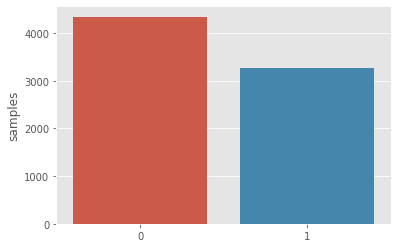

In [26]:
# show the barplot using sns. The X axis should be the index of x and the y axis should be the value of x
# https://seaborn.pydata.org/generated/seaborn.barplot.html
sns.barplot(x.index,x)

# set the label of y axis
# https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.gca.html
# https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.axes.Axes.set_ylabel.html#matplotlib.axes.Axes.set_ylabel
plt.gca().set_ylabel('samples')

ohh,as expected ! There is a class distribution.There are more tweets with class 0 ( No disaster) than class 1 ( disaster tweets)

## Exploratory Data Analysis of tweets

First,we will do very basic analysis,that is character level,word level and sentence level analysis.

### Number of characters in tweets

In [27]:
# get the length of text for each row of the train set which indicate disaster
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.len.html
tweet_len1=tweet[tweet['target']==1]['text'].str.len()

#checking
tweet_len1

0        69
1        38
2       133
3        65
4        88
       ... 
7608     83
7609    125
7610     65
7611    137
7612     94
Name: text, Length: 3271, dtype: int64

In [28]:
# get the length of text for each row of the train set which indicate non-disaster
tweet_len0=tweet[tweet['target']==0]['text'].str.len()

#checking
tweet_len0

15       14
16       13
17       16
18       17
19       28
       ... 
7581    104
7582     80
7584    127
7587     18
7593     60
Name: text, Length: 4342, dtype: int64

Text(0.5, 0.98, 'Characters in tweets')

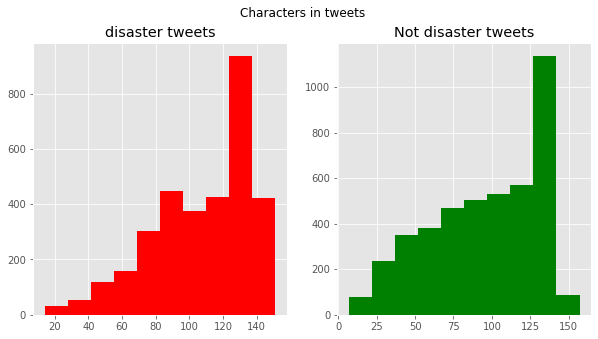

In [29]:
# create two subplots in a row. The figsize of the whole figure should be (10,5)
# https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.subplots.html
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))

# create a histrogram on the first axes of the tweet_len1 with red color
# https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.axes.Axes.hist.html
ax1.hist(tweet_len1,color='red')

# set title for the first subplot
# https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.axes.Axes.set_title.html
ax1.set_title('disaster tweets')

# create a histrogram on the first axes of the tweet_len0 with red color
ax2.hist(tweet_len0,color='green')

#set title for the second subplot
ax2.set_title('Not disaster tweets')

# set title of the whole figure
# https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.suptitle.html
fig.suptitle('Characters in tweets')

The distribution of both seems to be almost same.120 t0 140 characters in a tweet are the most common among both.

### Number of words in a tweet

In [30]:
# get the number of words in the text of each tweet of the train set which indicate a disaster
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.html
# https://docs.python.org/3/library/stdtypes.html#str.split
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.map.html
# https://docs.python.org/3/reference/expressions.html see the lambda expression
# https://docs.python.org/3/library/functions.html#len
tweet_len1=tweet[tweet['target']==1]['text'].str.split().map(lambda x: len(x))

#checking
print(tweet_len1)

0       13
1        7
2       22
3        8
4       16
        ..
7608    11
7609    20
7610     8
7611    19
7612    13
Name: text, Length: 3271, dtype: int64


In [31]:
# get the number of words in the text of each tweet of the train set which indicate a non-disaster
tweet_len0=tweet[tweet['target']==0]['text'].str.split().map(lambda x: len(x))

#checking
print(tweet_len0)

15       3
16       3
17       3
18       5
19       3
        ..
7581    13
7582    11
7584    13
7587     2
7593    12
Name: text, Length: 4342, dtype: int64


Text(0.5, 0.98, 'Words in a tweet')

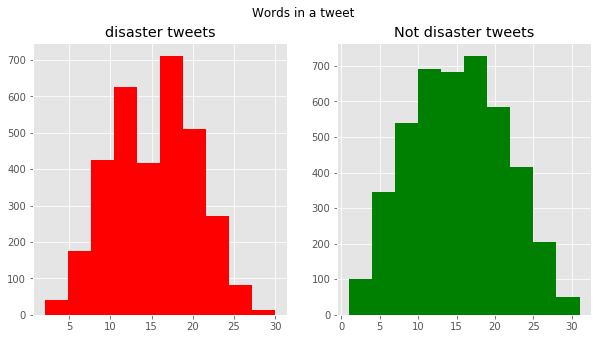

In [32]:
#create two subplots in a row. The figsize of the whole figure should be (10,5)
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))

# plot a histogram of tweet_len1 on the first subplot in red
ax1.hist(tweet_len1,color='red')

#set the title of the first subplot
ax1.set_title('disaster tweets')

# plot a histogram of tweet_len0 on the second subplot in green
ax2.hist(tweet_len0,color='green')

# set title of the second subplot
ax2.set_title('Not disaster tweets')

#set title of the whole figure
fig.suptitle('Words in a tweet')

###  Average word length in a tweet

In [33]:
# get the length of individual words of each tweet which indicates a disaster
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.apply.html
# keywords: str split lambda len
word_len1=tweet[tweet['target']==1]['text'].str.split().apply(lambda x : [len(i) for i in x])

#checking
word_len1

0                [3, 5, 3, 3, 6, 2, 4, 11, 3, 5, 7, 2, 3]
1                                   [6, 4, 4, 2, 5, 5, 6]
2       [3, 9, 5, 2, 8, 2, 6, 3, 5, 8, 2, 9, 2, 5, 10,...
3                             [6, 6, 7, 10, 10, 6, 2, 10]
4       [4, 3, 4, 4, 5, 4, 4, 7, 2, 5, 4, 10, 5, 4, 1, 6]
                              ...                        
7608                   [3, 5, 6, 7, 1, 6, 8, 4, 6, 5, 22]
7609    [12, 12, 3, 3, 2, 7, 4, 5, 2, 10, 4, 2, 3, 8, ...
7610                            [5, 6, 8, 1, 2, 7, 7, 22]
7611    [6, 13, 5, 2, 6, 8, 4, 1, 3, 2, 6, 9, 6, 5, 8,...
7612            [3, 7, 4, 5, 5, 2, 8, 10, 8, 1, 3, 4, 22]
Name: text, Length: 3271, dtype: object

In [34]:
# get the length of individual words of each tweet which indicates a non-disaster
word_len0=tweet[tweet['target']==0]['text'].str.split().apply(lambda x : [len(i) for i in x])

#checking
word_len0

15                                       [6, 2, 4]
16                                       [1, 4, 6]
17                                       [6, 2, 6]
18                                 [2, 3, 2, 2, 4]
19                                      [4, 1, 21]
                           ...                    
7581    [11, 5, 10, 2, 3, 7, 4, 3, 8, 7, 2, 8, 22]
7582            [7, 6, 1, 5, 4, 7, 8, 5, 1, 4, 22]
7584    [5, 5, 3, 5, 2, 8, 9, 7, 7, 8, 13, 20, 23]
7587                                       [6, 11]
7593          [1, 4, 5, 1, 6, 4, 4, 3, 8, 2, 6, 5]
Name: text, Length: 4342, dtype: object

Text(0.5, 0.98, 'Average word length in each tweet')

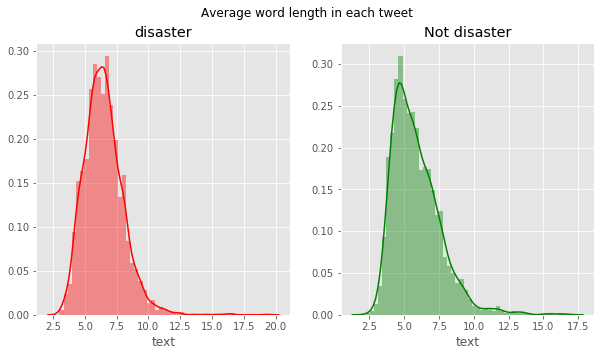

In [35]:
# create two subplots in a row. The figsize of the whole figure should be (10,5)
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))

# 'word_len1' is a 2D array. map this array into a 1D array consisting of the averages of each row
# plot the average length of words on a red distribution plot using seaborn and set the axis to be ax1. 
# https://seaborn.pydata.org/generated/seaborn.distplot.html
# https://numpy.org/devdocs/reference/generated/numpy.mean.html
sns.distplot(word_len1.map(lambda x: np.mean(x)),ax=ax1,color='red')

# set title of the first subplot
ax1.set_title('disaster')

# plot the average length of words on a green distribution using seaborn and set the axis to be ax2. 
sns.distplot(word_len0.map(lambda x: np.mean(x)),ax=ax2,color='green')

# set title of the second subplot
ax2.set_title('Not disaster')

# set title for the whole figure
fig.suptitle('Average word length in each tweet')

In [36]:
def create_corpus(target):
    
    #initialize corpus as an empty list
    corpus=[]
    
    # get the text of the tweets that matches with the target and append each word to the corpus 
    # keywords: str split
    for x in tweet[tweet['target']==target]['text'].str.split():
        for i in x:
            corpus.append(i)
    return corpus

# create corpus for non-disaster tweets
corpus=create_corpus(0)

#checking
print(len(corpus))
print(corpus[:10])

63848
["What's", 'up', 'man?', 'I', 'love', 'fruits', 'Summer', 'is', 'lovely', 'My']


### Common stopwords in tweets

First we  will analyze tweets with class 0 which is done above

In [37]:
# initialize a dictionary which should have strings as keys and integers as values
# https://docs.python.org/3/library/collections.html#collections.defaultdict
dic=defaultdict(int)

#checking
dic

defaultdict(int, {})

In [43]:
#save each stopword as key and the count of the respective stopword as the value in the dictionary.
#'stop' is the list of all stopwords
for word in corpus:
    if word in stop:
        dic[word]+=1
        
#checking
# print(type(dic))
# print(len(dic.items()))
print(list(dic.items())[:10])

dic

[('up', 1002), ('is', 3072), ('so', 1140), ('a', 6690), ('this', 1350), ('that', 1956), ('in', 4320), ('my', 2652), ('you', 3174), ('to', 6594)]


defaultdict(int,
            {'up': 1002,
             'is': 3072,
             'so': 1140,
             'a': 6690,
             'this': 1350,
             'that': 1956,
             'in': 4320,
             'my': 2652,
             'you': 3174,
             'to': 6594,
             'the': 9144,
             'out': 1032,
             'for': 2712,
             'me': 1170,
             'but': 1062,
             'they': 606,
             'will': 876,
             'these': 192,
             'on': 2322,
             "you're": 294,
             'and': 5040,
             'an': 720,
             'of': 5004,
             'with': 2094,
             'not': 972,
             'your': 1206,
             'have': 1314,
             'them': 282,
             'at': 1272,
             'has': 786,
             'our': 306,
             'was': 1230,
             'be': 1608,
             'if': 642,
             'yours': 96,
             'by': 1350,
             'about': 768,
             'their': 306,
      

In [18]:
#get the top 10 stopwords along with their counts
# https://docs.python.org/3/howto/sorting.html
# use a lambda expression to determine the key, use reverse.
top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10]

#checking
top

[('the', 1524),
 ('a', 1115),
 ('to', 1099),
 ('and', 840),
 ('of', 834),
 ('in', 720),
 ('you', 529),
 ('is', 512),
 ('for', 452),
 ('my', 442)]

In [19]:
# https://docs.python.org/3/library/functions.html#zip
# use zip(*) to unzip the values of top
x,y=zip(*top)

#checking
print(x)
print(y)

('the', 'a', 'to', 'and', 'of', 'in', 'you', 'is', 'for', 'my')
(1524, 1115, 1099, 840, 834, 720, 529, 512, 452, 442)


<BarContainer object of 10 artists>

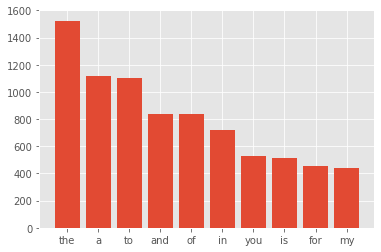

In [20]:
# plot the top 10 stopwords and their counts using pyplot
# https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.bar.html
plt.bar(x,y)

Now,we will analyze tweets with class 1.

In [21]:
# create corpus for disaster tweets
corpus=create_corpus(1)

#initialize a dictionary which should have strings as keys and integers as values
dic=defaultdict(int)

# save each stopword as key and the count of the respective stopword as the value in the dictionary.
# 'stop' is the list of all stopwords
for word in corpus:
    if word in stop:
        dic[word]+=1

# checking
print(len(dic.items()))
print(list(dic.items())[:10])
        

138
[('are', 150), ('the', 1051), ('of', 888), ('this', 110), ('all', 48), ('to', 706), ('in', 1037), ('being', 26), ('by', 244), ('other', 15)]


In [22]:
# get the top 10 stopwords along with their counts
top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10] 

# checking
top

[('the', 1051),
 ('in', 1037),
 ('of', 888),
 ('a', 730),
 ('to', 706),
 ('and', 462),
 ('on', 386),
 ('for', 368),
 ('is', 302),
 ('at', 273)]

In [23]:
# use zip(*) to unzip the values of top
x,y=zip(*top)

#checking
print(x)
print(y)

('the', 'in', 'of', 'a', 'to', 'and', 'on', 'for', 'is', 'at')
(1051, 1037, 888, 730, 706, 462, 386, 368, 302, 273)


<BarContainer object of 10 artists>

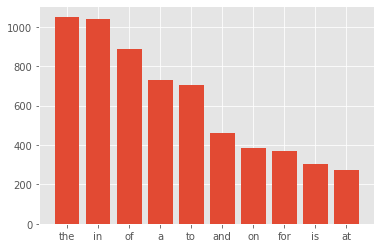

In [24]:
# plot the top 10 stopwords and their counts using pyplot
plt.bar(x,y)

In both of them,"the" dominates which is followed by "a" in class 0 and "in" in class 1.

### Analyzing punctuations.

First let's check tweets indicating real disaster.

In [25]:
#create corpus for disaster-tweets
corpus=create_corpus(1)

#initialize a dictionary which should have strings as keys and integers as values
dic=defaultdict(int)

import string

#get puncutation marks from the string module
special = string.punctuation

# checking
special

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [26]:
#save the punctuation mark as key and it's count in the corpus as value in the dictionary
for i in (corpus):
    if i in special:
        dic[i]+=1

# checking
print(len(dic.items()))
print(list(dic.items()))

18
[('=>', 1), ('-', 389), (':', 31), ('?', 11), ('.', 7), ('|', 51), ('+', 7), ('#', 2), ('!', 6), (']', 2), (')', 1), ("'", 5), (';', 3), ('/', 18), ('=', 4), ('@', 9), ('~', 14), ('*', 3)]


In [27]:
# initialize a pyplot figure with figsize (10,5)
# https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.figure.html
plt.figure(figsize=(10,5)) 

# use zip(*) to unzip dic.items()
x,y=zip(*dic.items())

#checking
print(x)
print(y)

('=>', '-', ':', '?', '.', '|', '+', '#', '!', ']', ')', "'", ';', '/', '=', '@', '~', '*')
(1, 389, 31, 11, 7, 51, 7, 2, 6, 2, 1, 5, 3, 18, 4, 9, 14, 3)


<Figure size 720x360 with 0 Axes>

<BarContainer object of 18 artists>

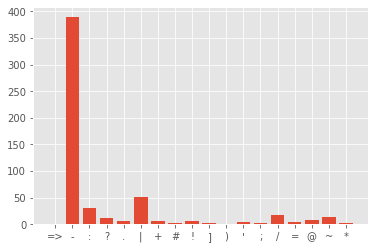

In [28]:
# plot the counts on the y axis in red and the punctuation marks on the x axis
plt.bar(x,y)

Now,we will move on to class 0.

In [29]:
#create corpus for disaster-tweets
corpus=create_corpus(0)

#initialize a dictionary which should have strings as keys and integers as values
dic=defaultdict(int)

import string

#get puncutation marks from the string module
special = string.punctuation

#save the punctuation mark as key and it's count in the corpus as value in the dictionary
for i in (corpus):
    if i in special:
        dic[i]+=1
        
# checking
print(len(dic.items()))
print(list(dic.items()))

20
[('-', 374), ('|', 91), (':', 30), ('@', 18), ('+', 24), ('.', 12), ('~', 7), ('?', 26), ('/:', 1), ('!', 12), ('/', 17), ('#', 5), ('=', 13), ("'", 6), ('*', 11), ('(', 5), (')', 2), ('_', 1), ('$', 1), ('%', 1)]


In [30]:
#initialize a pyplot figure with figsize (10,5)
plt.figure(figsize=(10,5))
        
# use zip(*) to unzip the values of top
x,y=zip(*dic.items())

#checking
print(x)
print(y)

('-', '|', ':', '@', '+', '.', '~', '?', '/:', '!', '/', '#', '=', "'", '*', '(', ')', '_', '$', '%')
(374, 91, 30, 18, 24, 12, 7, 26, 1, 12, 17, 5, 13, 6, 11, 5, 2, 1, 1, 1)


<Figure size 720x360 with 0 Axes>

<BarContainer object of 20 artists>

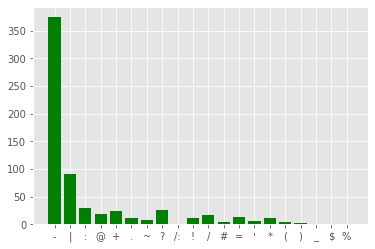

In [31]:
#plot the counts on the y axis in green and the punctuation marks on the x axis
plt.bar(x,y,color='green')

### Common words ?

In [32]:
# get a Counter object that contains each word and it's count as key-value pairs using 'Counter' module
# from the last loaded corpus
# https://docs.python.org/3/library/collections.html#collections.Counter
counter=Counter(corpus)

# checking
print(type(counter))
print(len(counter.items()))
print(list(counter.items())[:10])

<class 'collections.Counter'>
20560
[("What's", 12), ('up', 167), ('man?', 1), ('I', 938), ('love', 59), ('fruits', 1), ('Summer', 7), ('is', 512), ('lovely', 2), ('My', 78)]


In [33]:
# get the most common words and their counts
# https://docs.python.org/3/library/collections.html#collections.Counter see most_common
most=counter.most_common()

# checking
print(len(most))
print(most[:10])

20560
[('the', 1524), ('a', 1115), ('to', 1099), ('I', 938), ('and', 840), ('of', 834), ('in', 720), ('you', 529), ('is', 512), ('for', 452)]


In [34]:
#initialize x and y as empty lists
x=[]
y=[]

#checking
print(x)
print(y)

[]
[]


In [35]:
#loop through the top 40 words haveing the highest count,
for word,count in most[:40]:
    
    # append the word with x and append it's count with y if the word is not a stop word
    if (word not in stop) :
        x.append(word)
        y.append(count)

#checking
print(x)
print(y)

['I', '-', 'The', 'like', '&amp;', "I'm", '??', 'get']
[938, 374, 295, 233, 190, 185, 183, 142]


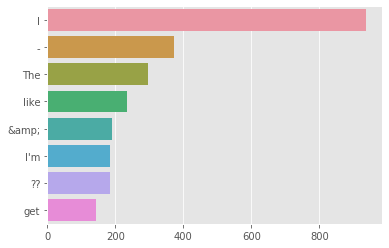

In [36]:
# show a barplot using seaborn where the y axis represents each word and x axis represents the counts of each word
sns.barplot(x=y,y=x)

Lot of cleaning needed !

### Ngram analysis

we will do a bigram (n=2) analysis over the tweets.Let's check the most common bigrams in tweets.

In [37]:
# A bigram or digram is a sequence of two adjacent elements from a string of tokens, 
# which are typically letters, syllables, or words.
# get the list of tuples where each tuple contains two adjacent words and the number of times they appear together
# in the text

# the corpus is a data-series extracted from a dataframe (The 'text' column of the csv)
corpus = tweet['text']

# we want to get the top 10 bigrams
n=10

#checking
corpus

0       Our Deeds are the Reason of this #earthquake M...
1                  Forest fire near La Ronge Sask. Canada
2       All residents asked to 'shelter in place' are ...
3       13,000 people receive #wildfires evacuation or...
4       Just got sent this photo from Ruby #Alaska as ...
                              ...                        
7608    Two giant cranes holding a bridge collapse int...
7609    @aria_ahrary @TheTawniest The out of control w...
7610    M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...
7611    Police investigating after an e-bike collided ...
7612    The Latest: More Homes Razed by Northern Calif...
Name: text, Length: 7613, dtype: object

In [38]:
# CountVectorizer is used to Convert a collection of text documents to a matrix of 
# token counts initialize a CountVectorizer object with ngram_range (2,2)
# https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html
vectorizer = CountVectorizer(ngram_range=(2, 2))

# checking
vectorizer

CountVectorizer(ngram_range=(2, 2))

In [39]:
# get a vocabulary dictionary of all tokens in the raw documents
# corpus is the collection of raw documents.
# the return value of CountVectorizer.fit is also a CountVectorizer
# https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html#sklearn.feature_extraction.text.CountVectorizer.fit
vec = vectorizer.fit(corpus)

# the vocabulary is created by taking all the combinations of two words which appear 
# side by side with each other in the text corpus.
# vec.vocabulary_ is a dictionary where each key (a string) represents a single pair 
# of words appearing side-by-side with each other in the corpus and each value 
# represents that word-pair's position in the vocabulary. The position is defined by the
# alphabetical position of that word-pair in the vocabulary.

#checking
print("size of vocabulary, len(vec.vocabulary_.items())=",len(vec.vocabulary_.items()))
print(list(vec.vocabulary_.items())[:10])

size of vocabulary, len(vec.vocabulary_.items())= 68496
[('our deeds', 45009), ('deeds are', 19448), ('are the', 5238), ('the reason', 57892), ('reason of', 48799), ('of this', 43435), ('this earthquake', 59092), ('earthquake may', 21677), ('may allah', 38297), ('allah forgive', 2932)]


In [40]:
# Transform documents to document-term matrix.
# Extract token counts out of raw text document using the vocabulary provided to the constructor.
# https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html#sklearn.feature_extraction.text.CountVectorizer.transform
bag_of_words = vec.transform(corpus)
    
#checking
# bag of words has the shape (number of line in corpus,number of items in vocabulary)
print("bag_of_words.shape=",bag_of_words.shape)
    
# bag_of_words is a sparse matrix. Eg. bag_of_words[9] is an array which has 
# a size equal to the amount of items in the vocabulary. Each 1 in that array indicates
# that a word-pair in the 9th text was matched with an item in the vocabulary.
# bag_of_words is a 2D array. bag_of_words is also a 2D array but has only one row
print("bag_of_words[:10].toarray():\n",bag_of_words[:10].toarray())
print("bag_of_words[0]:\n",bag_of_words[0])
print("type(bag_of_words):\n",type(bag_of_words))

bag_of_words.shape= (7613, 68496)
bag_of_words[:10].toarray():
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
bag_of_words[0]:
   (0, 2932)	1
  (0, 5238)	1
  (0, 19448)	1
  (0, 21677)	1
  (0, 25546)	1
  (0, 38297)	1
  (0, 43435)	1
  (0, 45009)	1
  (0, 48799)	1
  (0, 57892)	1
  (0, 59092)	1
  (0, 62611)	1
type(bag_of_words):
 <class 'scipy.sparse.csr.csr_matrix'>


In [41]:
# get the total count of occurences of each word-pair in the corpus.
# each row represents a line of text in the corpus
# each column represents a word-pair of the vocabulary. So, to get the count of
# occurences of each word pair, we need the column-wise sum of the bag_of_words
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.csr_matrix.sum.html
sum_words = bag_of_words.sum(axis=0) 

#checking
# sum_words now contains the count of occurences of each word-pair in the corpus
# sum_words is a 2D array with only one row.
print("sum_words.shape=",sum_words.shape)
print(sum_words[0,:10])

sum_words.shape= (1, 68496)
[[3 1 2 2 5 1 1 4 1 8]]


In [42]:
# create a list of tuples where each item of the tuple
# contains the word-pair and it's count of occurence
# keywords: for in
words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]

#checking
words_freq[:10]

[('our deeds', 1),
 ('deeds are', 1),
 ('are the', 16),
 ('the reason', 2),
 ('reason of', 2),
 ('of this', 9),
 ('this earthquake', 1),
 ('earthquake may', 1),
 ('may allah', 3),
 ('allah forgive', 1)]

In [43]:
# sort the list of tuples by the count in descending order
# keywords: sorted lambda
words_freq_sorted =sorted(words_freq, key = lambda x: x[1], reverse=True)

#checking 
words_freq_sorted[:10]

[('http co', 4306),
 ('https co', 410),
 ('in the', 308),
 ('of the', 256),
 ('û_ http', 217),
 ('on the', 129),
 ('to the', 126),
 ('to be', 108),
 ('for the', 97),
 ('at the', 85)]

In [44]:
# take the first n tuples of word_freq and assign it to top_tweet_bigram
top_tweet_bigrams=words_freq_sorted[:n]

#checking
top_tweet_bigrams

[('http co', 4306),
 ('https co', 410),
 ('in the', 308),
 ('of the', 256),
 ('û_ http', 217),
 ('on the', 129),
 ('to the', 126),
 ('to be', 108),
 ('for the', 97),
 ('at the', 85)]

In [45]:
# convert top_tweet_bigrams into x and y
# x is the list of word-pairs from top_tweet_bigram
# y is the list of counts from top_tweet_bigram
# https://docs.python.org/3/library/functions.html#map
# https://docs.python.org/3/library/functions.html#func-list
# keywords: zip*
x,y=map(list,zip(*top_tweet_bigrams))

#checking 
print(x)
print(y)

['http co', 'https co', 'in the', 'of the', 'û_ http', 'on the', 'to the', 'to be', 'for the', 'at the']
[4306, 410, 308, 256, 217, 129, 126, 108, 97, 85]


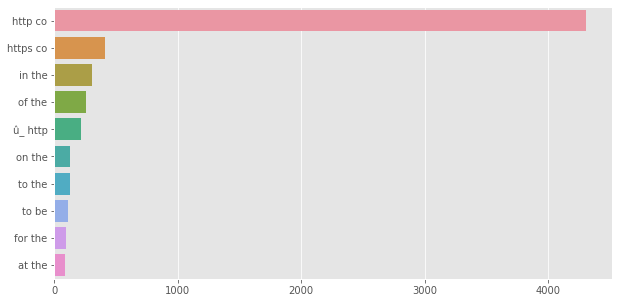

In [46]:
#initialize a figure of figsize (10,5) using pyplot
plt.figure(figsize=(10,5))

# create a barplot using seaborn where the x axis represents the counts and the y axis
# represents the word-pairs
sns.barplot(x=y,y=x)

We will need lot of cleaning here..